<a href="https://colab.research.google.com/github/VitorCabrall/Machine-and-Deep-Learning/blob/main/Deep%20Learning%20Classificacao%20roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


## Importando Dados

In [51]:
dataset = keras.datasets.fashion_mnist
((x_train,y_train),(x_test,y_test))=dataset.load_data()


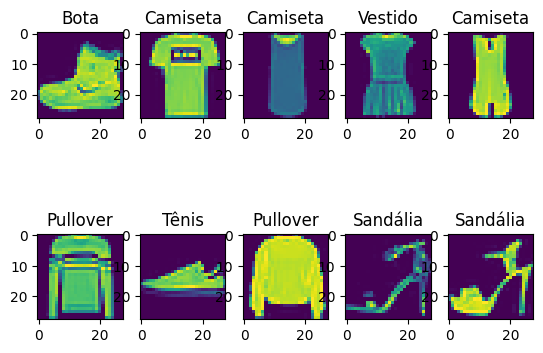

In [52]:
# Plotagem

nomes = ['Camiseta','Calça','Pullover','Vestido','Casaco',
         'Sandália','Camisa','Tênis','Bolsa','Bota']
for imagem in range(10):
  plt.subplot(2,5,imagem+1)
  plt.imshow(x_train[imagem])
  plt.title(nomes[y_train[imagem]])

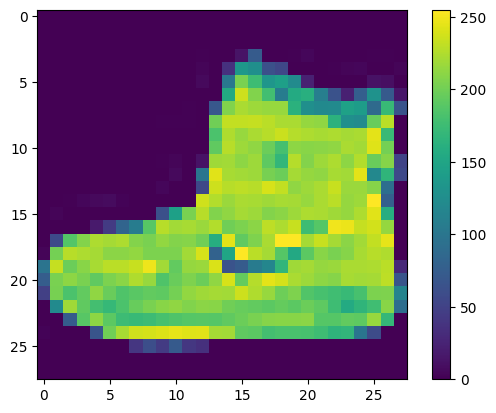

In [53]:
#Idenfificando o range de cores
plt.imshow(x_train[0])
plt.colorbar()

## Criando Modelo

In [54]:
#Normalizando os dados
#Como a imagem tem uma variação de cor de 255 possivibilidades, vamos dividir o valor para virar um flot de 0 a 1.
x_train = x_train / float(255)

In [63]:
modelo = keras.Sequential(
    [
    #Entrada
    keras.layers.Flatten(input_shape = (28,28)), # Camada inicial de entrada, que achata a imagem de (28 x 28) para uma com (1 X 784)

    #Processamento
    keras.layers.Dense(256,activation = tensorflow.nn.relu),  # Criando 256 nós que conectam os dados anteriores. A ativação relu é uma função do keras para ativar a conecção entre os nós de forma a criar linhas não lineares
    keras.layers.Dropout(0.2), # Diminui o overfitting ao desabilitar alguns nós durante o treino, recomenda-se 0.2
    
    keras.layers.Dense(128,activation = tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
     
    keras.layers.Dense(64,activation = tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
     
    #Saída
    keras.layers.Dense(10,activation = tensorflow.nn.softmax) # Criando uma camada de saida com 10 opções, e usando o softmax para calcular a probabilidade de cada uma 
    ]
)

#Compilando modelo
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ["accuracy"])

#Treinando modelo
histórico = modelo.fit(x_train,y_train , epochs = 6,validation_split = 0.2)

Epoch 1/6
1500/1500 [==============================] - 11s 7ms/step - loss: 0.6197 - accuracy: 0.7745 - val_loss: 0.4472 - val_accuracy: 0.8368
Epoch 2/6
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4443 - accuracy: 0.8398 - val_loss: 0.3910 - val_accuracy: 0.8551
Epoch 3/6
1500/1500 [==============================] - 10s 6ms/step - loss: 0.4058 - accuracy: 0.8528 - val_loss: 0.3581 - val_accuracy: 0.8710
Epoch 4/6
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3802 - accuracy: 0.8629 - val_loss: 0.3666 - val_accuracy: 0.8668
Epoch 5/6
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3632 - accuracy: 0.8683 - val_loss: 0.3462 - val_accuracy: 0.8754
Epoch 6/6
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3524 - accuracy: 0.8730 - val_loss: 0.3580 - val_accuracy: 0.8733


## Salvando Modelo

In [71]:
from tensorflow.keras.models import load_model

modelo.save("Classificacao_roupas.h5")
modelo_salvo = load_model("Classificacao_roupas.h5")

## Prevendo resultados

In [64]:
predicoes = modelo.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [65]:
#A predição retorna um array com as probabilidades de cada rótulo
predicoes[0] 

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.99999994],
      dtype=float32)

Rótulo previsto: Casaco
Rótulo Real: Casaco


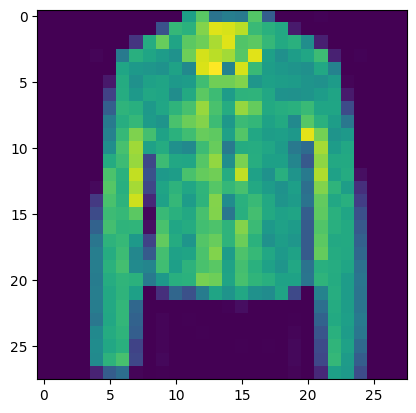

In [66]:
item = 10
print("Rótulo previsto: {}".format(nomes[np.argmax(predicoes[item])])) # A funçaõ argmax do numpy retorna a posição que contem o maior valor
print("Rótulo Real: {}".format(nomes[y_test[item]]))

plt.imshow(x_test[item])

## Avaliando o modelo

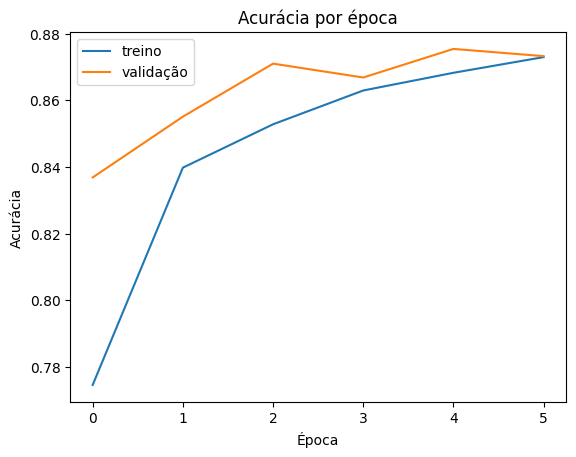

In [67]:
#Avaliando o gráfico de acurácia de avaliação e de treino

plt.plot(histórico.history["accuracy"])
plt.plot(histórico.history["val_accuracy"])
plt.title("Acurácia por época")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.legend(['treino','validação'])

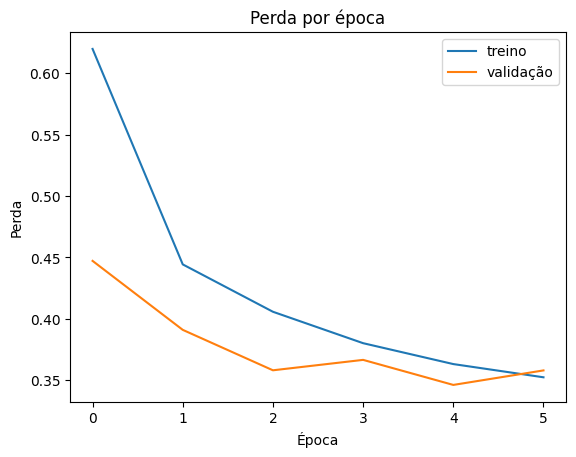

In [68]:
#Avaliando o gráfico de perda de avaliação e de treino

plt.plot(histórico.history["loss"])
plt.plot(histórico.history["val_loss"])
plt.title("Perda por época")
plt.xlabel("Época")
plt.ylabel("Perda")
plt.legend(['treino','validação'])

In [69]:
# Validando dados de teste
modelo.evaluate(x_test,y_test) #  Nos resultados é retornado uma lista contendo o valor de perda e a acurácia

313/313 [==============================] - 1s 2ms/step - loss: 39.5583 - accuracy: 0.8592


[39.55827331542969, 0.8592000007629395]